# Time Series Forecasting

reference site : [Time Series Forecasting](https://h3imdallr.github.io/2017-08-19/arima/)

Analysis Gantry CPU using time Series with ARIMA

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# EDA: 시계열 데이터 확인하기 
import datetime 
from dateutil.relativedelta import relativedelta

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
#df = pd.read_csv('../csv_data/datasets_20066_26008_portland-oregon-average-monthly-.csv', index_col='Month')
col_list = ['date', 'cpu']    # 컬럼 선택
df = pd.read_csv('../csv_data/m_data.csv', usecols=col_list, index_col='date')
df.head()

,cpu
date,
2020-06-29,0.092267
2020-06-29,0.093267
2020-06-29,0.093200
2020-06-29,0.092067
2020-06-29,0.096600


In [5]:
df.dropna(axis=0, inplace=True)
df.columns = ['ridership']
print(df.head(), '\n...\n', df.tail())

            ridership
date                 
2020-06-29   0.092267
2020-06-29   0.093267
2020-06-29   0.093200
2020-06-29   0.092067
2020-06-29   0.096600 
...
             ridership
date                 
2020-07-10   0.124333
2020-07-10   0.147067
2020-07-10   0.124133
2020-07-10   0.115800
2020-07-10   0.117333


In [6]:
df = df.iloc[:-1]
print(df.tail())

            ridership
date                 
2020-07-10   0.137733
2020-07-10   0.124333
2020-07-10   0.147067
2020-07-10   0.124133
2020-07-10   0.115800


In [7]:
df.index = pd.to_datetime(df.index)
type(df.index); 
print(df.head(), '\n...\n', df.tail())

            ridership
date                 
2020-06-29   0.092267
2020-06-29   0.093267
2020-06-29   0.093200
2020-06-29   0.092067
2020-06-29   0.096600 
...
             ridership
date                 
2020-07-10   0.137733
2020-07-10   0.124333
2020-07-10   0.147067
2020-07-10   0.124133
2020-07-10   0.115800


In [8]:
time_window_l = datetime.datetime(2020, 6, 30)
time_window_r = datetime.datetime(2020, 7, 9)
temp_df = df[
    (df.index >= time_window_l)
    & (df.index <= time_window_r)
]
print(temp_df)

            ridership
date                 
2020-06-30   0.091467
2020-06-30   0.092467
2020-06-30   0.093933
2020-06-30   0.092133
2020-06-30   0.089600
...               ...
2020-07-09   0.112933
2020-07-09   0.105000
2020-07-09   0.103267
2020-07-09   0.107467
2020-07-09   0.100599

[1440 rows x 1 columns]


In [9]:
temp_df = df[:time_window_l]
print(temp_df)

            ridership
date                 
2020-06-29   0.092267
2020-06-29   0.093267
2020-06-29   0.093200
2020-06-29   0.092067
2020-06-29   0.096600
...               ...
2020-06-30   0.097133
2020-06-30   0.108000
2020-06-30   0.095467
2020-06-30   0.106733
2020-06-30   0.105133

[215 rows x 1 columns]


In [10]:
df['ridership'] = df['ridership'].astype(float)
print(df.dtypes)

ridership    float64
dtype: object


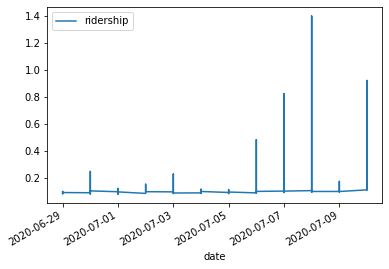

In [11]:
df.plot()

<Figure size 720x720 with 0 Axes>

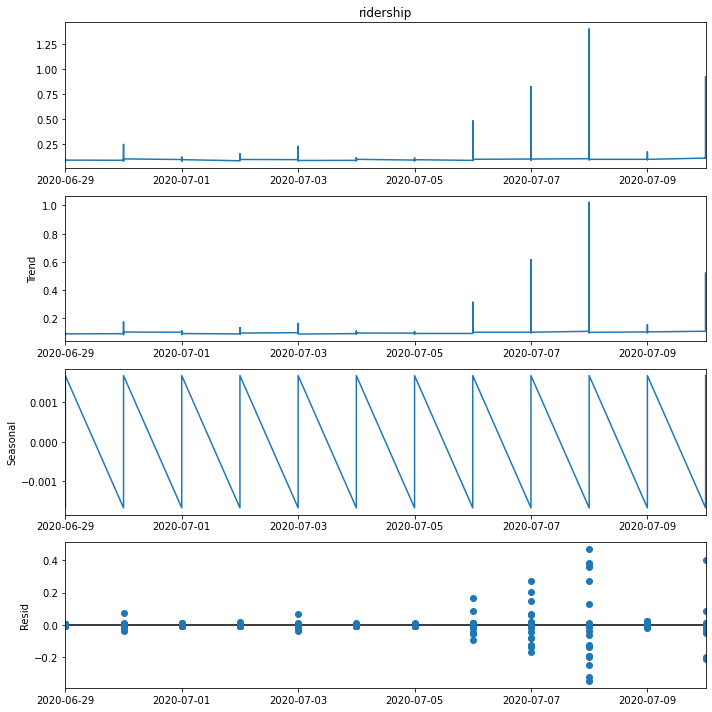

In [12]:
decomposition = seasonal_decompose(df['ridership'], period=2)
plt.rcParams['figure.figsize'] = [10,10]
fig = plt.figure()
fig = decomposition.plot()

In [27]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(2).mean()
    rolstd = timeseries.rolling(2).std()
    
    fig = plt.figure(figsize=(10, 6 ))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    

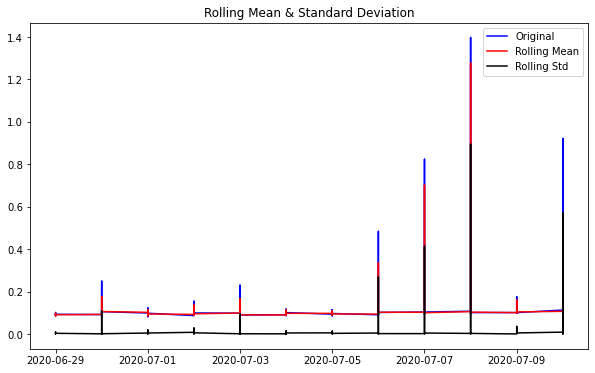

<Results of Dickey-Fuller Test>
Test Statistic                -6.255683e+00
p-value                        4.344865e-08
#Lags Used                     1.300000e+01
Number of Observations Used    1.527000e+03
Critical Value (1%)           -3.434640e+00
Critical Value (5%)           -2.863435e+00
Critical Value (10%)          -2.567779e+00
dtype: float64


In [28]:
test_stationarity(df['ridership'])

In [29]:
df['first_difference'] = df['ridership'] - df['ridership'].shift(1)

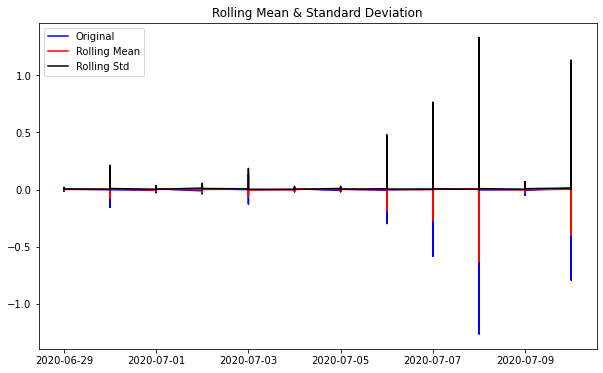

<Results of Dickey-Fuller Test>
Test Statistic                -1.439674e+01
p-value                        8.642224e-27
#Lags Used                     1.600000e+01
Number of Observations Used    1.523000e+03
Critical Value (1%)           -3.434651e+00
Critical Value (5%)           -2.863440e+00
Critical Value (10%)          -2.567781e+00
dtype: float64


In [30]:
test_stationarity(df.first_difference.dropna(inplace=False))

In [31]:
df['seasonal_first_difference'] = df['first_difference'] - df['first_difference'].shift(4)

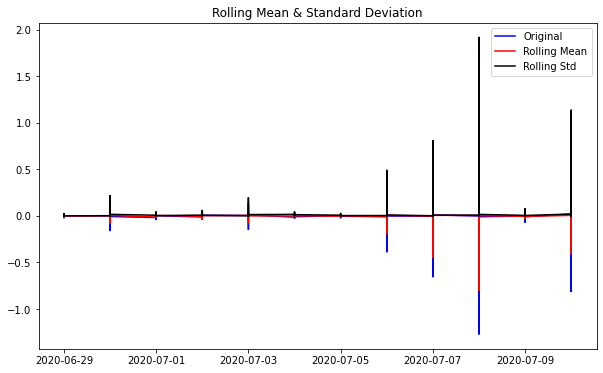

<Results of Dickey-Fuller Test>
Test Statistic                -1.504230e+01
p-value                        9.553949e-28
#Lags Used                     2.400000e+01
Number of Observations Used    1.511000e+03
Critical Value (1%)           -3.434685e+00
Critical Value (5%)           -2.863455e+00
Critical Value (10%)          -2.567789e+00
dtype: float64


In [32]:
test_stationarity(df.seasonal_first_difference.dropna(inplace=False))

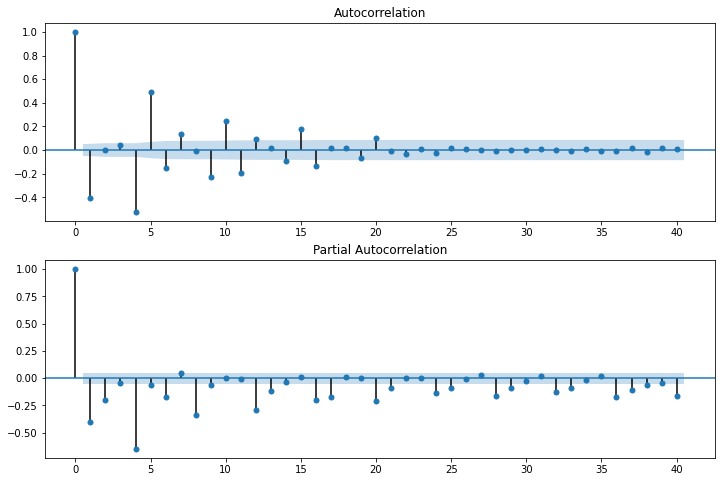

In [33]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[13:],lags=40,ax=ax2)

In [34]:
mod = sm.tsa.SARIMAX(df['ridership'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print (results.summary())

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                            ridership   No. Observations:                 1541
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                1643.837
Date:                              Fri, 10 Jul 2020   AIC                          -3281.674
Time:                                      06:10:42   BIC                          -3265.679
Sample:                                           0   HQIC                         -3275.721
                                             - 1541                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0340      0.022      1.572      0.116      -0.008       0.076
ma.S.L12      -0.98

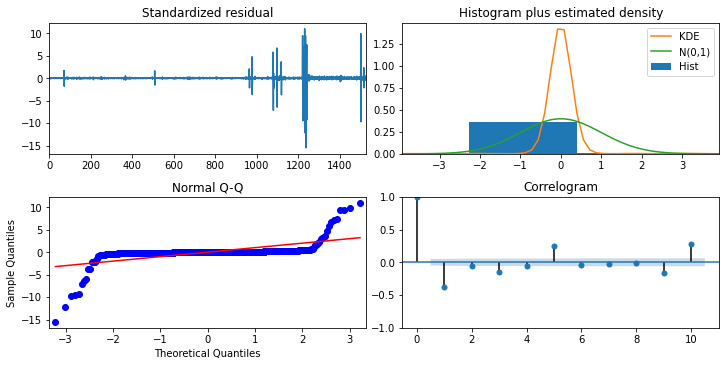

In [35]:
plt.rcParams['figure.figsize'] = [10,5]
results.plot_diagnostics();
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


,ridership,first_difference,seasonal_first_difference,forecast
date,,,,
2020-07-10,0.121000,-0.007600,-2.266667e-02,NaN
2020-07-10,0.134733,0.013733,2.833333e-02,NaN
2020-07-10,0.131467,-0.003267,-8.117333e-01,NaN
2020-07-10,0.131867,0.000400,7.936000e-01,NaN
2020-07-10,0.126067,-0.005800,1.800000e-03,NaN
2020-07-10,0.127931,0.001864,-1.186923e-02,NaN
2020-07-10,0.127733,-0.000197,3.069225e-03,NaN
2020-07-10,0.130067,0.002333,1.933333e-03,NaN
2020-07-10,0.124267,-0.005800,-8.484879e-14,NaN


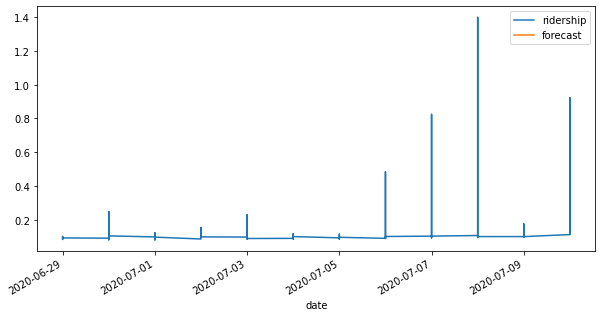

In [36]:
# 시계열 예측
df['forecast'] = results.predict(start = len(df)-24, end= len(df), dynamic= True)  
df[['ridership', 'forecast']].plot()
df[-24:]

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


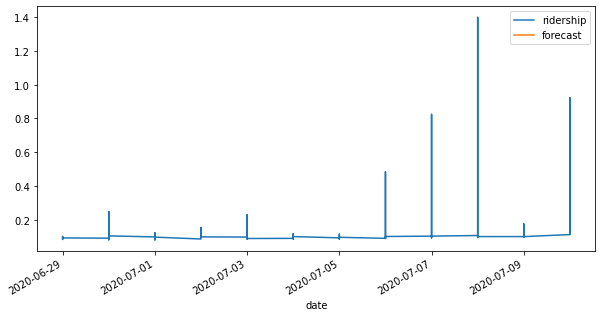

In [23]:
# 24개월 예측
df['forecast'] = results.predict(start = len(df)-24, end= len(df), dynamic= True)  
df[['ridership', 'forecast']].plot()

In [24]:
#start = datetime.datetime.strptime("2020-07-01", "%Y-%m-%d")
## >2020-07-01 00:00:00
#date_list = [start + relativedelta(months=x) for x in range(0,12)]
##> 1982/7/1,8/1, ... 1983/6/1

#future_df = pd.DataFrame(index=date_list, columns= df.columns)
#new_df = pd.concat([df, future_df]) #concatenated  dataframe
## print(new_df.head(),'\n...\n',new_df.tail())

In [25]:
#new_df['forecast'] = results.predict(start = len(df), end = len(df)+11, dynamic= True)  
#new_df[['ridership', 'forecast']].ix[-48:].plot()

In [26]:
#print(df.forecast[-12:])